In [ ]:
# Install pysam package in current environment
# !conda install bioconda::pysam # Install pysam package in system environment
# in torch_cuda environment
# PackagesNotFoundError: The following packages are not available from current channels:

#   - bioconda::pysam

# Current channels:

#   - https://conda.anaconda.org/conda-forge
#   - defaults
#   - https://conda.anaconda.org/bioconda
#   - https://conda.anaconda.org/nvidia/win-64
#   - https://conda.anaconda.org/nvidia/noarch
#   - https://conda.anaconda.org/pytorch/win-64
#   - https://conda.anaconda.org/pytorch/noarch

# To search for alternate channels that may provide the conda package you're
# looking for, navigate to

#     https://anaconda.org

# and use the search bar at the top of the page.

In [ ]:
conda config --add channels bioconda
conda config --add channels conda-forge
conda install pysam

In [ ]:
%conda install bioconda::pysam --yes 

In [2]:
%conda install bioconda/label/cf201901::pysam --yes

Channels:
 - conda-forge
 - defaults
 - bioconda/label/cf201901
 - nvidia
 - pytorch
Platform: win-64
Solving environment: ...working... failed

Note: you may need to restart the kernel to use updated packages.



PackagesNotFoundError: The following packages are not available from current channels:

  - bioconda/label/cf201901::pysam

Current channels:

  - https://conda.anaconda.org/conda-forge
  - defaults
  - https://conda.anaconda.org/bioconda/label/cf201901
  - https://conda.anaconda.org/nvidia/win-64
  - https://conda.anaconda.org/nvidia/noarch
  - https://conda.anaconda.org/pytorch/win-64
  - https://conda.anaconda.org/pytorch/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [ ]:
pip install pysam # only this one sucess 

In [3]:
# 文件: pgx_variant_calling.py
# 运行: pip install pandas pysam matplotlib

# import pysam  # 用于 VCF 处理
import pandas as pd
import matplotlib.pyplot as plt


In [4]:

# 步骤 1: 模拟比对和变异调用 (GATK 示例)
# 实际命令:
# bwa mem hg38.fa R1.fq.gz R2.fq.gz > aligned.sam
# samtools sort aligned.bam -o sorted.bam
# gatk HaplotypeCaller -R hg38.fa -I sorted.bam -O pgx.vcf

# 步骤 2: 加载模拟 VCF 数据
vcf_data = pd.DataFrame({
  'CHROM': ['22'],
  'POS': [42128945],
  'REF': ['G'],
  'ALT': ['A'],
  'GT': ['0/1'],
  'Gene': ['CYP2D6'],
  'Allele': ['*4'],
  'Phenotype': ['IM'],
  'Evidence': ['CPIC Level A']
})

vcf_data

,CHROM,POS,REF,ALT,GT,Gene,Allele,Phenotype,Evidence
0,22,42128945,G,A,0/1,CYP2D6,*4,IM,CPIC Level A


In [12]:

# 步骤 3: 注释与过滤
# 模拟 PharmVar/CPIC 注释
vcf_data['Recommendation'] = "Avoid codeine, adjust tamoxifen dose"  # CPIC 指南
#print("PGx 变异注释结果:\n", vcf_data)
print( vcf_data)


  CHROM       POS REF ALT   GT    Gene Allele Phenotype      Evidence  \
0    22  42128945   G   A  0/1  CYP2D6     *4        IM  CPIC Level A   

                         Recommendation  
0  Avoid codeine, adjust tamoxifen dose  


In [9]:
vcf_data

,CHROM,POS,REF,ALT,GT,Gene,Allele,Phenotype,Evidence,Recommendation
0,22,42128945,G,A,0/1,CYP2D6,*4,IM,CPIC Level A,"Avoid codeine, adjust tamoxifen dose"


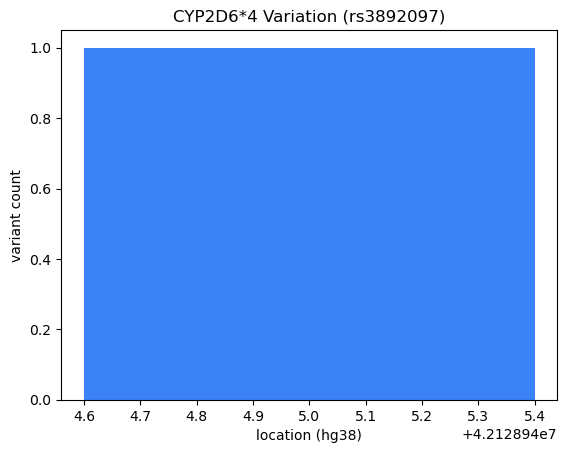

In [14]:

# 步骤 4: 可视化变异位置
plt.bar(vcf_data['POS'], [1], color = "#3B82F6")
plt.title("CYP2D6*4 Variation (rs3892097)")
plt.xlabel("location (hg38)")
plt.ylabel("variant count")
plt.show()

# 保存报告
vcf_data.to_csv("pgx_report.csv", index = False)

# c:\Users\zhen-\anaconda3\envs\torch_cuda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 32622 (\N{CJK UNIFIED IDEOGRAPH-7F6E}) missing from font(s) DejaVu Sans.
#  fig.canvas.print_figure(bytes_io, **kw)  CJK (Chinese, Japanese, and Korean) character. 